# Pymaceuticals Inc.
---

### Analysis
- 51% of the mice selected for the study were male, while 49% were female.
- The primary drug regimen employed for cancer treatment was Capomulin.
- Individual mouse data snapshots indicated a positive response to the Capomulin treatment, demonstrating its effectiveness in     reducing tumor volume over the study duration.
- The correlation coefficient of 0.84 highlighted a strong positive relationship between mouse weight and average tumor volume,   suggesting that as mouse weight increases, the average tumor volume tends to increase as well.
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df=mouse_metadata.merge(study_results,how="outer")
mouse_study_df
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
no_of_mouse = mouse_study_df['Mouse ID'].nunique()
no_of_mouse

249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df= mouse_study_df[mouse_study_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID.

duplicateID_df= mouse_study_df.loc[mouse_study_df["Mouse ID"]== "g989", :]
duplicateID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_df= mouse_study_df[ mouse_study_df["Mouse ID"]!= "g989"]
clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.

no_of_mouse = clean_study_df['Mouse ID'].nunique()
no_of_mouse

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_df = mouse_study_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
median = drug_regimen_df["Tumor Volume (mm3)"].median()
variance = drug_regimen_df["Tumor Volume (mm3)"].var()
stdeviation = drug_regimen_df["Tumor Volume (mm3)"].std()
sem = drug_regimen_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df= pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": stdeviation,
    "Tumor Volume Std. Err.": sem
})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

aggrigate = {"Tumor Volume (mm3)": [ "mean","median", "var", "std","sem"]}

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_df.groupby("Drug Regimen").agg(aggrigate)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

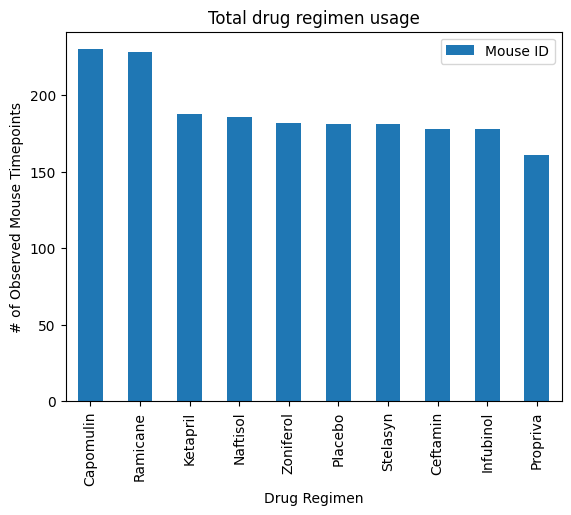

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

MouseID_count = pd.DataFrame(drug_regimen_df["Mouse ID"].count())
MouseID_count_sorted = MouseID_count.sort_values(by="Mouse ID", ascending=False)
regimen_chart= MouseID_count_sorted.plot(kind="bar",title="Total drug regimen usage")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show

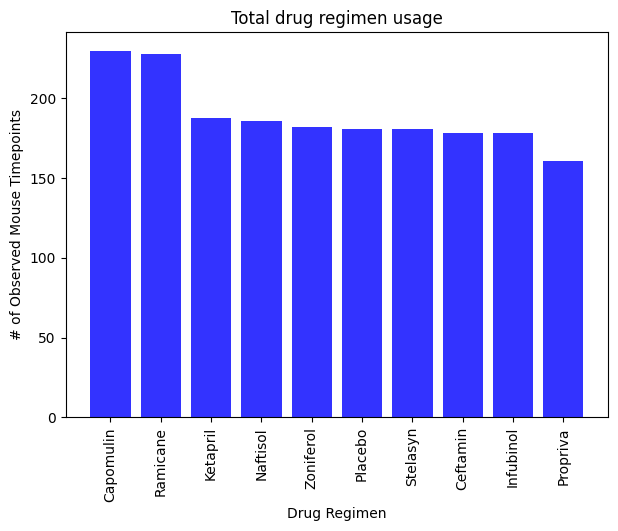

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

MouseID_count = pd.DataFrame(drug_regimen_df["Mouse ID"].count())
MouseID_count_sorted = MouseID_count.sort_values(by="Mouse ID", ascending=False)

# Extract data for plotting
drug_regimens = MouseID_count_sorted.index
observed_timepoints = MouseID_count_sorted["Mouse ID"]

# Plotting using pyplot
plt.figure(figsize=(7, 5))
plt.bar(drug_regimens, observed_timepoints, color="b", alpha=0.8)
plt.title("Total drug regimen usage")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()



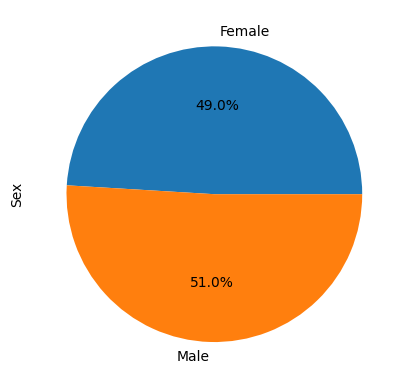

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df= clean_study_df.groupby("Sex")
gender_count=gender_df["Sex"].count()
gender_plot=gender_count.plot(kind="pie", y= "Sex", autopct="%1.1f%%")
plt.show()

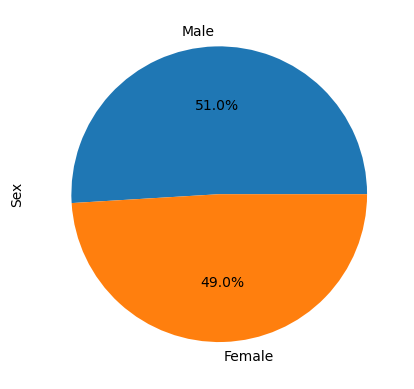

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels= ["Female", "Male"] 
count= gender_count["Female"], gender_count["Male"]
plt.pie(count, labels= gender_labels, autopct="%1.1f%%")

plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_study_df.groupby("Mouse ID")
greatest_timepoint=greatest_timepoint["Timepoint"].max()
greatest_timepoint_df=pd.DataFrame(greatest_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df=pd.merge(greatest_timepoint_df,clean_study_df, on = ["Mouse ID", "Timepoint"] )
tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_Capomulin=[]
tumor_volume_Ramicane=[]
tumor_volume_Infubinol=[]
tumor_volume_Ceftamin=[]

for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_volume_Capomulin.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_volume_Ramicane.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_volume_Infubinol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_volume_Ceftamin.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
        
#Create a list for four tumor volumes for main list to use in for loop
tumor_volume=[tumor_volume_Capomulin, tumor_volume_Ramicane, tumor_volume_Infubinol, tumor_volume_Ceftamin ]



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list=[]
for i in range(len(tumor_volume)):
    quartiles = pd.Series(tumor_volume[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
    for j in range(len(tumor_volume[i])):
        if (tumor_volume[i][j] < lower_bound) or (tumor_volume[i][j] > upper_bound):
            outlier = tumor_volume[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")



Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Th

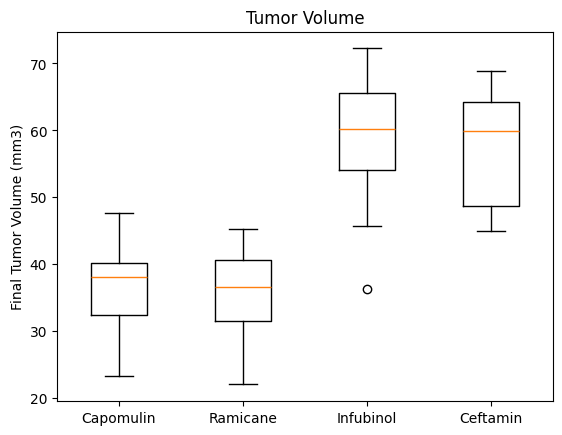

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1=plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [105]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"].head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [106]:
I509_tumor=mouse_study_df.loc[mouse_study_df["Mouse ID"]=="l509"]
I509_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


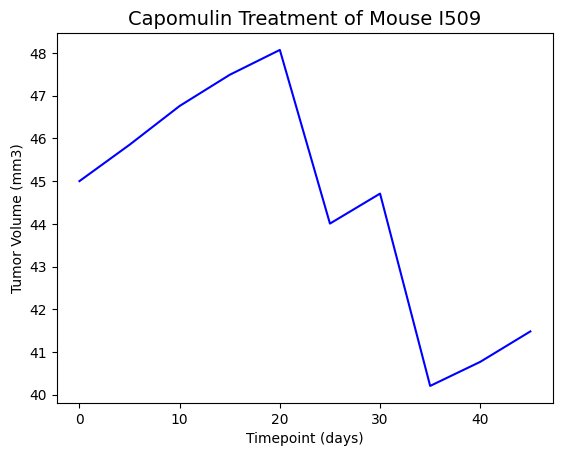

In [107]:
plt.plot(I509_tumor["Timepoint"],I509_tumor["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse I509", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

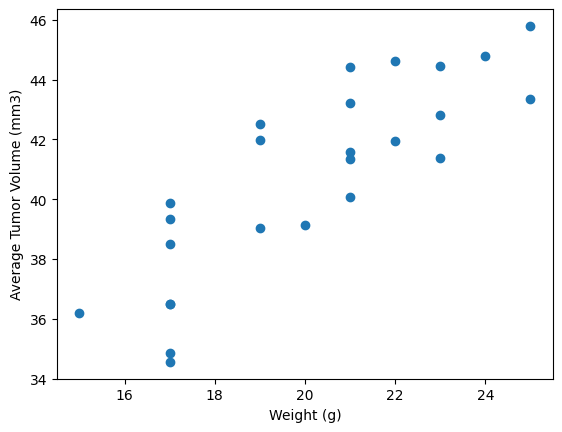

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df= mouse_study_df.loc[mouse_study_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumor=Capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight=Capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight,average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [125]:
# Calculate the correlation coefficient
correlation_coefficient =np.round(st.pearsonr(mouse_weight, average_tumor)[0], 2)
print(f"The correlation coefficient between weight of a mouse and average tumor volume is{correlation_coefficient}")

The correlation coefficient between weight of a mouse and average tumor volume is[0.84]


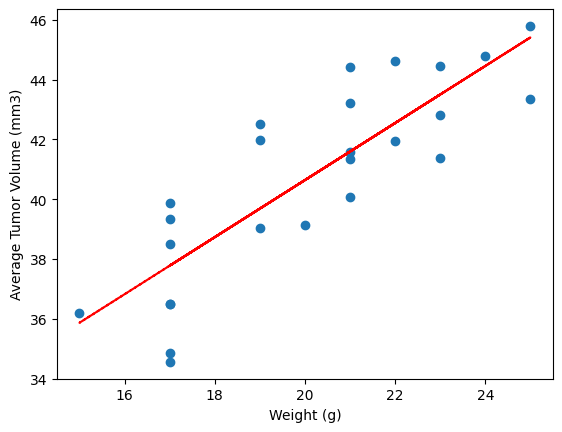

In [126]:
# Calculate linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#perform a linear regression on mouse weight vs average observed tumor volume

mouse_weight = mouse_weight.astype(float)
re_slop, re_int, re_r, re_p,re_std_err = st.linregress(mouse_weight, average_tumor)

# Create equation of lenear regression line 
re_fit= re_slop * mouse_weight + re_int

#plot the scatter plot with linear model

Capomulin_df= mouse_study_df.loc[mouse_study_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumor=Capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight=Capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight,average_tumor)
plt.plot(mouse_weight,re_fit,"--", color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()